# Importing Libraries

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import  callbacks
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
%matplotlib inline

# for Interactive Shells
from IPython.display import display

#removing warnings
import sys
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [4]:
df = pd.read_csv('Datasets/concrete_data.csv')
df.shape

(1030, 9)

    The dataset contains 1030 observations accross 8 input variables and an output variable. The variable name, variable type, the measurement unit and a brief description is provided.

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## There are 8 independent variables in training set:
    Cement: Total amount of cement it that particular sample.
    
    Blast Furnace Slag: Blast furnace slag (BFS) is a byproduct of the iron and steel manufacturing process. BFS is used to improve the strength and durability of concrete.
    
    FlyAsh : It improves the strength and durability of the concrete.
    
    Water: The optimal water content for cement is usually between 15-20% of the total cement weight. Too little water will result in a dry, crumbly mix, while too much water can lead to a weak, porous concrete.
    
    Superplasticizer: Superplasticizers, also known as plasticizers or high range water reducers, are a type of admixture that is used to increase the workability of concrete without increasing the water-cement ratio.
    
    CoarseAggregatet: Coarse aggregate is used for a variety of purposes, including providing strength, improving the workability of concrete, and reducing the amount of cement needed in a concrete mix.
    
    FineAggregate: Similar as CoarseAggregateComponent but smaller in size.
    
    Age: Age in days is a term used to describe the amount of time that has passed since the cement was mixed with water. Concrete gains strength over time and its properties can change significantly depending on the age. The most commonly used ages for testing concrete strength are 7, 14, 21, and 28 days.
    
## Target varibale:
    Strength: Strength of the cement.

# Data Preprocessing

    Some machine learning algorithms require features to be scaled through normalization or standardization. I will now split the dataset into training and testing and then perform standardization. This will tansform the features such that their mean and standard deviation will become 0 and 1.

In [6]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [7]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 43)

In [8]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.transform(X_test)

# Model Building using ANN

In [12]:
model1 = Sequential()

# Adding the input layer and the first hidden layer
model1.add(Dense(units = 100, 
                     kernel_initializer = 'uniform', 
                     activation = 'relu', 
                     input_shape = [X_train.shape[1]]))
               

# Adding the second hidden layer
model1.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the Third hidden layer
model1.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
model1.add(Dense(units = 90, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
model1.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [13]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               900       
                                                                 
 dense_13 (Dense)            (None, 60)                6060      
                                                                 
 dense_14 (Dense)            (None, 80)                4880      
                                                                 
 dense_15 (Dense)            (None, 90)                7290      
                                                                 
 dense_16 (Dense)            (None, 100)               9100      
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 28331 (110.67 KB)
Trainable params: 2833

In [14]:
# Compiling the ANN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model1.fit(X_train,y_train,
                          batch_size=62 , 
                          epochs=100 , 
                          validation_split=0.1,
                          verbose = 1)


Epoch 1/100

12/12 [==============================] - 2s 22ms/step - loss: 1473.2574 - val_loss: 1560.8676
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 1469.1240 - val_loss: 1548.2644
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1447.3260 - val_loss: 1526.7328
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 1439.3129 - val_loss: 1526.5796
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 1439.2864 - val_loss: 1526.5795
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 1439.2864 - val_loss: 1526.5795
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 1439.2864 - val_loss: 1526.5795
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 1439.2864 - val_loss: 1526.5795
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 1439.2864 - val_loss: 1526.5795
Epoch 10/100
12/12 [==============================] 

12/12 [==============================] - 0s 4ms/step - loss: 1439.2864 - val_loss: 1526.5795
Epoch 75/100
12/12 [==============================] - 0s 4ms/step - loss: 1439.2864 - val_loss: 1526.5795
Epoch 76/100
12/12 [==============================] - 0s 4ms/step - loss: 1439.2863 - val_loss: 1526.5795
Epoch 77/100
12/12 [==============================] - 0s 4ms/step - loss: 1439.2864 - val_loss: 1526.5795
Epoch 78/100
12/12 [==============================] - 0s 4ms/step - loss: 1439.2863 - val_loss: 1526.5795
Epoch 79/100
12/12 [==============================] - 0s 4ms/step - loss: 1439.2863 - val_loss: 1526.5795
Epoch 80/100
12/12 [==============================] - 0s 4ms/step - loss: 1439.2864 - val_loss: 1526.5795
Epoch 81/100
12/12 [==============================] - 0s 4ms/step - loss: 1439.2864 - val_loss: 1526.5795
Epoch 82/100
12/12 [==============================] - 0s 4ms/step - loss: 1439.2864 - val_loss: 1526.5795
Epoch 83/100
12/12 [==============================] - 0s 4m

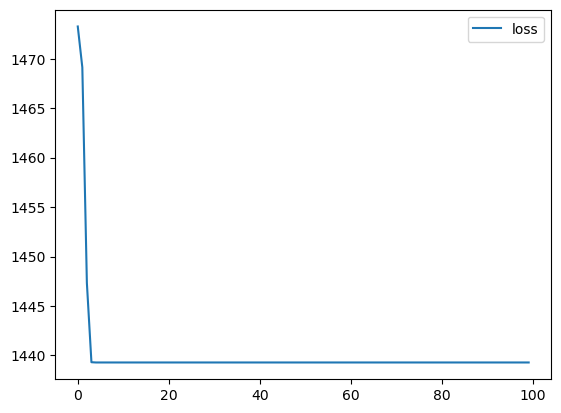

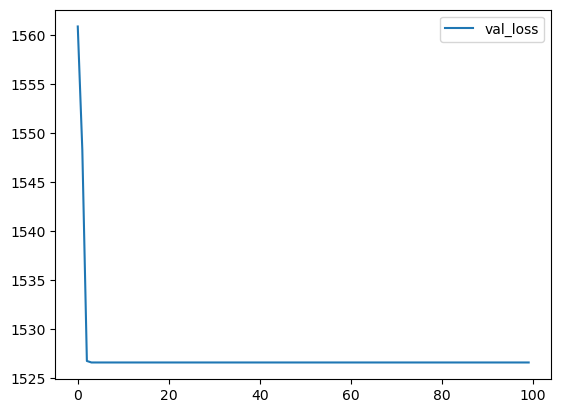

In [15]:
history = pd.DataFrame(history.history)
history.loc[:, ['loss']].plot();
history.loc[:, ['val_loss']].plot();

In [16]:
y_pred = model1.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [17]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-4.958108794052669

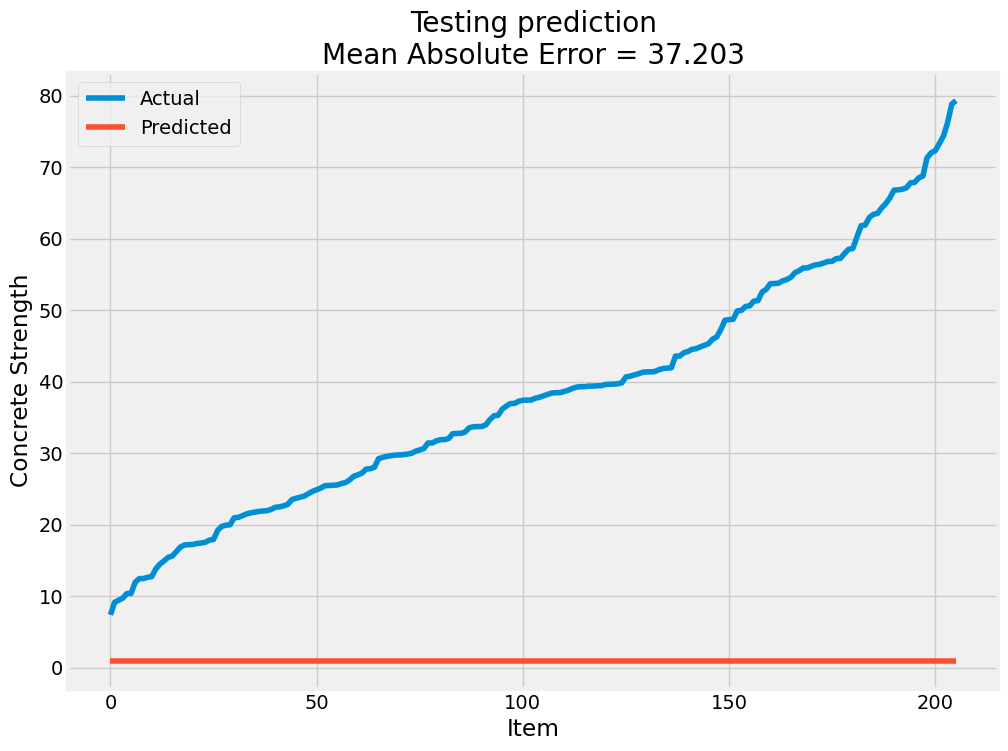

In [18]:
MAE = mae(y_test,y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):

    plt.plot(sorted(y_test), label='Actual')
    plt.plot(sorted(y_pred), label='Predicted')
#     plt.fill_between(x=np.arange(0,len(y_pred)),
#                      y1=np.array(sorted(y_pred)+MAE),
#                      y2=sorted(y_pred)-MAE, 
#                      alpha=0.1, color='r', label='MAE')

    plt.title('Testing prediction\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()

# Model Tuning

In [19]:
model2 = keras.Sequential([
    Dense(40 , activation = 'relu' , input_shape = [X_train.shape[1]]),
    Dense(50 , activation = 'relu'),
    Dense(60 , activation = 'relu'),
    Dense(1 , activation = 'linear')
])

In [20]:
# summary of the model
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 40)                360       
                                                                 
 dense_19 (Dense)            (None, 50)                2050      
                                                                 
 dense_20 (Dense)            (None, 60)                3060      
                                                                 
 dense_21 (Dense)            (None, 1)                 61        
                                                                 
Total params: 5531 (21.61 KB)
Trainable params: 5531 (21.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model2.compile(optimizer='Adam', loss = 'mean_squared_error' , )

In [22]:
history = model2.fit(X_train,y_train,batch_size=62 , epochs=100 , validation_split=.1,verbose = 1)

Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 1467.7598 - val_loss: 1523.7391
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 1393.2543 - val_loss: 1426.3699
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1261.5378 - val_loss: 1245.3717
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 1029.8484 - val_loss: 934.4264
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 684.3983 - val_loss: 538.2199
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 374.0757 - val_loss: 312.5636
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 277.1182 - val_loss: 265.5463
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 230.0687 - val_loss: 236.2469
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 208.8282 - val_loss: 221.4463
Epoch 10/100
12/12 [==============================] - 0s 4ms/step

12/12 [==============================] - 0s 4ms/step - loss: 29.6669 - val_loss: 40.8587
Epoch 81/100
12/12 [==============================] - 0s 4ms/step - loss: 29.4298 - val_loss: 37.2014
Epoch 82/100
12/12 [==============================] - 0s 4ms/step - loss: 28.2711 - val_loss: 37.5777
Epoch 83/100
12/12 [==============================] - 0s 4ms/step - loss: 28.6032 - val_loss: 39.1531
Epoch 84/100
12/12 [==============================] - 0s 4ms/step - loss: 27.4326 - val_loss: 35.9273
Epoch 85/100
12/12 [==============================] - 0s 4ms/step - loss: 26.9017 - val_loss: 36.4775
Epoch 86/100
12/12 [==============================] - 0s 4ms/step - loss: 26.6429 - val_loss: 35.8179
Epoch 87/100
12/12 [==============================] - 0s 3ms/step - loss: 25.6217 - val_loss: 35.6151
Epoch 88/100
12/12 [==============================] - 0s 4ms/step - loss: 25.4702 - val_loss: 35.6824
Epoch 89/100
12/12 [==============================] - 0s 4ms/step - loss: 25.8661 - val_loss: 3

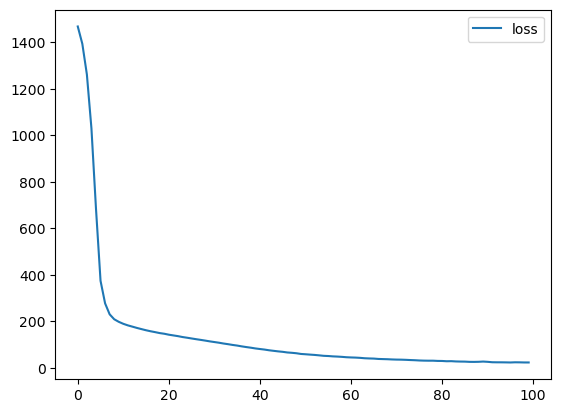

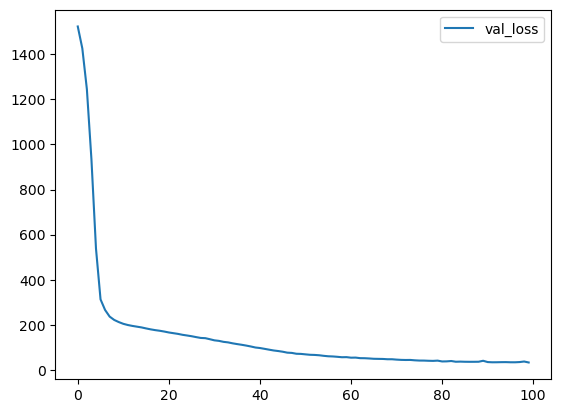

In [23]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot();
history_df.loc[:, ['val_loss']].plot();

# Prediction on Unseen Data

In [24]:
y_pred = model2.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8375016513532773

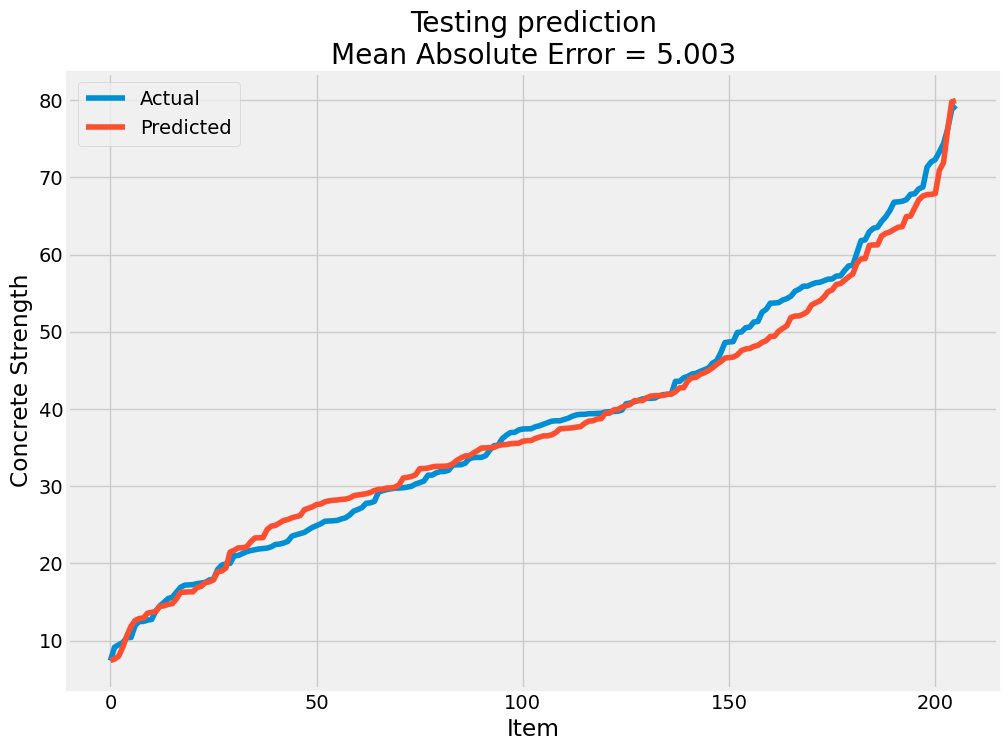

In [26]:
MAE = mae(y_test,y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):

    plt.plot(sorted(y_test), label='Actual')
    plt.plot(sorted(y_pred), label='Predicted')
#     plt.fill_between(x=np.arange(0,len(y_pred)),
#                      y1=np.array(sorted(y_pred)+MAE),
#                      y2=sorted(y_pred)-MAE, 
#                      alpha=0.1, color='r', label='MAE')

    plt.title('Testing prediction\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()

# Improving ANN with Dropout layer

In [29]:
model3 = keras.Sequential([
    Dense(30 , activation = 'relu' , input_shape = [X_train.shape[1]]),
    Dense(40 , activation = 'relu'),
    Dropout(rate = 0.1),
    Dense(50 , activation = 'relu'),
    Dense(1 , activation = 'linear')
])

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 30)                270       
                                                                 
 dense_25 (Dense)            (None, 40)                1240      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_26 (Dense)            (None, 50)                2050      
                                                                 
 dense_27 (Dense)            (None, 1)                 51        
                                                                 
Total params: 3611 (14.11 KB)
Trainable params: 3611 (14.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Compiling the ANN
model3.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model3.fit(X_train,y_train,
                          batch_size=62 , 
                          epochs=100 , 
                          validation_split=0.1,
                          verbose = 1)

Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 1482.3364 - val_loss: 1541.9192
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 1425.0078 - val_loss: 1471.5044
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1341.7010 - val_loss: 1354.1720
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 1196.0109 - val_loss: 1162.3611
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 972.2288 - val_loss: 877.7889
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 666.4923 - val_loss: 546.4498
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 373.8625 - val_loss: 331.5893
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 252.0670 - val_loss: 304.7820
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 231.9332 - val_loss: 275.7639
Epoch 10/100
12/12 [==============================] - 0s 4ms/ste

12/12 [==============================] - 0s 4ms/step - loss: 69.8278 - val_loss: 61.5239
Epoch 81/100
12/12 [==============================] - 0s 4ms/step - loss: 68.8123 - val_loss: 61.6011
Epoch 82/100
12/12 [==============================] - 0s 4ms/step - loss: 66.3213 - val_loss: 60.9429
Epoch 83/100
12/12 [==============================] - 0s 4ms/step - loss: 65.3773 - val_loss: 59.0003
Epoch 84/100
12/12 [==============================] - 0s 4ms/step - loss: 63.1130 - val_loss: 58.6765
Epoch 85/100
12/12 [==============================] - 0s 4ms/step - loss: 61.1347 - val_loss: 55.8842
Epoch 86/100
12/12 [==============================] - 0s 4ms/step - loss: 65.7152 - val_loss: 56.2227
Epoch 87/100
12/12 [==============================] - 0s 4ms/step - loss: 63.4244 - val_loss: 53.5452
Epoch 88/100
12/12 [==============================] - 0s 4ms/step - loss: 63.4732 - val_loss: 53.8998
Epoch 89/100
12/12 [==============================] - 0s 4ms/step - loss: 62.4859 - val_loss: 5

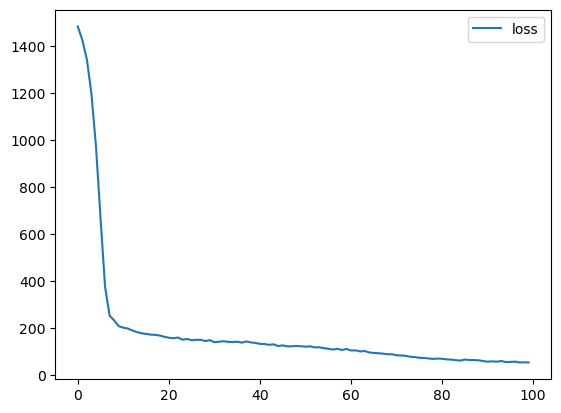

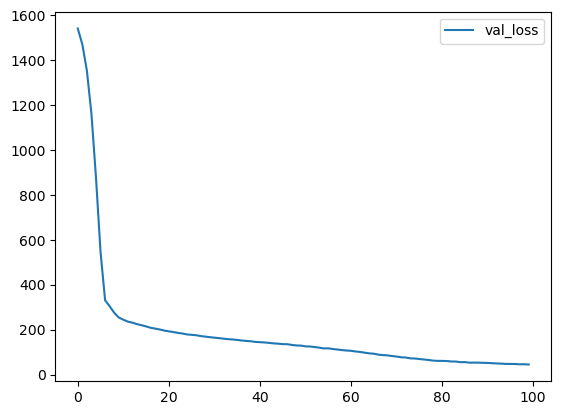

In [31]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot();
history_df.loc[:, ['val_loss']].plot();

In [32]:
y_pred = model3.predict(X_test)

7/7 [==============================] - 0s 1ms/step


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7809077086402723

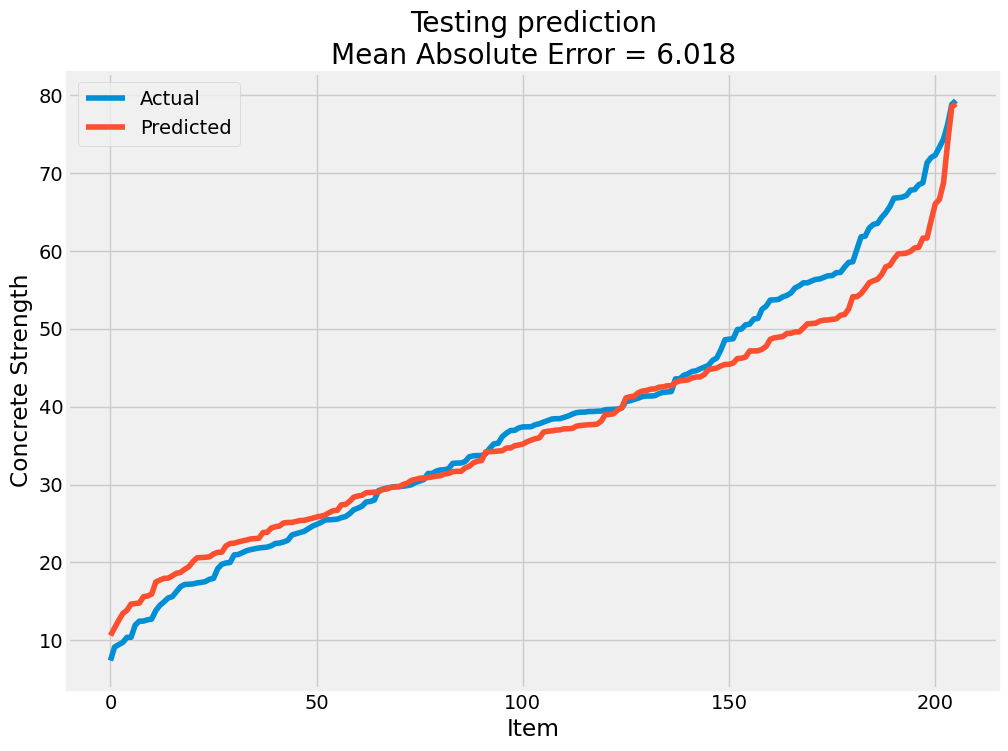

In [34]:
MAE = mae(y_test,y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):

    plt.plot(sorted(y_test), label='Actual')
    plt.plot(sorted(y_pred), label='Predicted')
#     plt.fill_between(x=np.arange(0,len(y_pred)),
#                      y1=np.array(sorted(y_pred)+MAE),
#                      y2=sorted(y_pred)-MAE, 
#                      alpha=0.1, color='r', label='MAE')

    plt.title('Testing prediction\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()

# Conclusion
    We trained three ANN model using Different Fine Tuning Technique, from all the three models 2nd model is giving better performance so will select the second model for Deployment